In [1]:
import scipy.io
import numpy as np

# Carregar dades des del fitxer .mat 
mat = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-letters.mat")

# Accedir a les dades
X_letters_train = mat['dataset']['train'][0,0]['images'][0,0]
y_letters_train = mat['dataset']['train'][0,0]['labels'][0,0]
X_letters_test = mat['dataset']['test'][0,0]['images'][0,0]
y_letters_test = mat['dataset']['test'][0,0]['labels'][0,0]

# Reformatar
X_letters_train = X_letters_train.reshape((-1, 28, 28), order='F').astype(np.uint8)
X_letters_test = X_letters_test.reshape((-1, 28, 28), order='F').astype(np.uint8)
y_letters_train = y_letters_train.flatten() - 1  # Canviar de 1-26 a 0-25
y_letters_test = y_letters_test.flatten() - 1

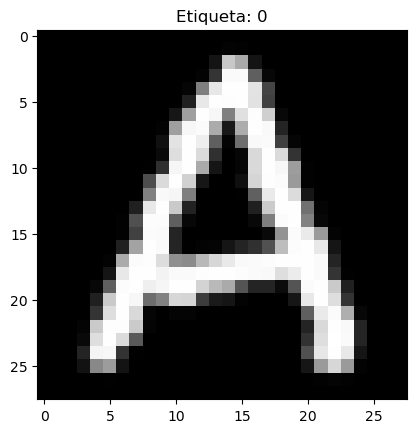

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_letters_train[32], cmap='gray')
plt.title(f"Etiqueta: {y_letters_train[32]}")
plt.show()

In [3]:
mat_digits = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-digits.mat")

# Dades d'entrenament
X_digits_train = mat_digits['dataset']['train'][0,0]['images'][0,0]
y_digits_train = mat_digits['dataset']['train'][0,0]['labels'][0,0]

# Dades de test
X_digits_test = mat_digits['dataset']['test'][0,0]['images'][0,0]
y_digits_test = mat_digits['dataset']['test'][0,0]['labels'][0,0]

In [4]:
# Format de les imatges (vector --> matriu 28x28)
X_digits_train = X_digits_train.reshape(-1, 28, 28, order='F').astype(np.uint8)
X_digits_test = X_digits_test.reshape(-1, 28, 28, order='F').astype(np.uint8)

# Ajusta etiquetes: els dígits van del 0 al 9, no cal restar 1
y_digits_train = y_digits_train.flatten()
y_digits_test = y_digits_test.flatten()

# Reassignar etiquetes dels dígits perquè no se solapin amb les lletres
y_digits_train += 26
y_digits_test += 26

In [5]:
# Unim els conjunts d'entrenament
X_train_total = np.concatenate([X_letters_train, X_digits_train], axis=0)
y_train_total = np.concatenate([y_letters_train, y_digits_train], axis=0)

# I els conjunts de test
X_test_total = np.concatenate([X_letters_test, X_digits_test], axis=0)
y_test_total = np.concatenate([y_letters_test, y_digits_test], axis=0)

# Normalització: valors entre 0 i 1
X_train_total = X_train_total / 255.0
X_test_total = X_test_total / 255.0

# Afegim canal (blanc i negre = 1 canal)
X_train_total = X_train_total.reshape(-1, 28, 28, 1)
X_test_total = X_test_total.reshape(-1, 28, 28, 1)

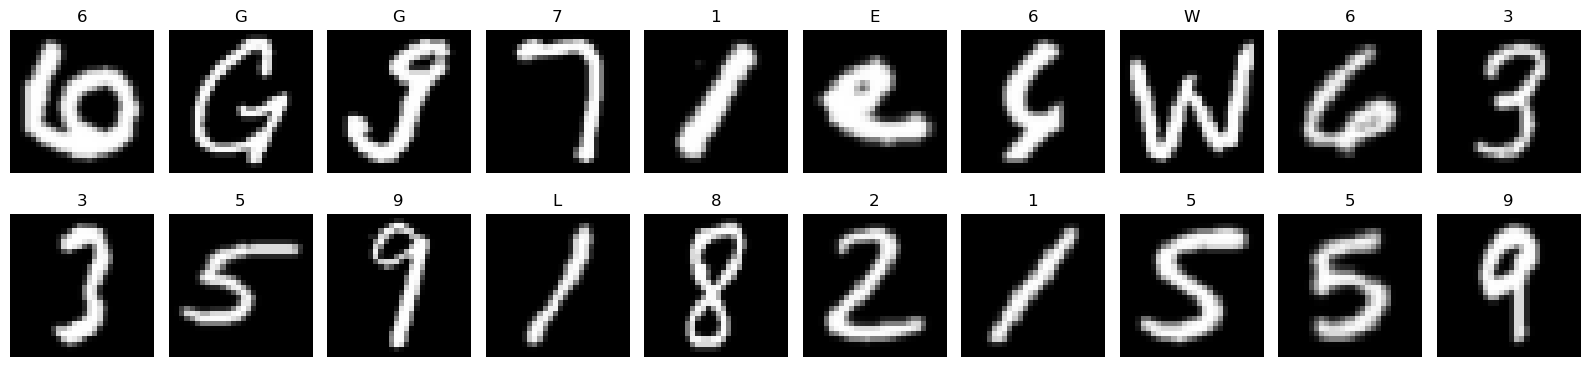

In [6]:
import string

# Mostra 20 imatges aleatòries del conjunt total
indices = np.random.choice(len(X_train_total), size=20, replace=False)

fig, axes = plt.subplots(2, 10, figsize=(16, 4))

for i, idx in enumerate(indices):
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    
    ax.imshow(X_train_total[idx].squeeze(), cmap="gray")
    
    label = y_train_total[idx]
    if label < 26:
        # Lletra (A–Z)
        title = string.ascii_uppercase[label]
    else:
        # Dígit (0–9)
        title = str(label - 26)
        
    ax.set_title(f"{title}")
    ax.axis('off')

plt.tight_layout()
plt.show()